# Module 1

## Sequencing

Sagner Sequencing / First Generation Sequencing 

Second Generation Sequencing / Next Generation Sequencing / Massively Parallel Sequencing
- inexpensive because we can sequence many DNA at one time.
- improved speed, accuracy, easy to use ness

## Genomes as strings, reads as substrings

- dna encodes the genome.
- genome = all the genes.
- AT, CG
- think of chromosomes as long strings.

Sequences 
- sequencers are bad at reading long stretches of dna, they like short sequences
- sequencing reads = small sections read out from the DNA, from anywhere, beginning middle end whatever
- reads are each like 100nt long.
- usually have enough reads to cover the whole genome a couple times over, often there are redundant reads. 

## Strings and python definition 

strings are sequence of characters.
for us, mostly just ACTG 

In [2]:
s = 'actg'

len(s)

4

In [3]:
len('') # empty string 

0

In [4]:
s[0] # index

'a'

In [5]:
# concatenation 
s + 'a'

'actga'

In [7]:
# substring 
s[0:3] # [0, 3)

'act'

In [10]:
# prefix (starts at 0) 
s = 'aaccggtt' 
s[0:6]
s[:6] # same thing 

'aaccgg'

In [15]:
# suffix (ending with last index) 
s[-4:] # 4 positions from the end of the string to the end of a string
s[4:] # same thing 

'ggtt'

In [17]:
s[::-1] # reverse a string. 

'ttggccaa'

## String Basics

In [22]:
seqs = ['actg', 'agt'] 
('').join(seqs) # join list with no spaces. 

'actgagt'

In [28]:
# random string sequence 
import random 
random.seed(8) # always gives you same random nucleotide 
print(random.choice('acgt')) # randomly chosen nucleotide from that string 
print(random.choice('acgt')) # randomly chosen nucleotide from that string 

c
g


In [32]:
seq = ''
for _ in range(10):
    seq += random.choice('acgt')
print(seq)

taagcatcca


In [35]:
# list comprehensions 
seq = ''.join([random.choice('actg') for _ in range(10)])
print(seq)

actcattcta


In [39]:
seq[7:] # suffix 

'cta'

In [41]:
seq[-3:] # starts at 3rd to end 

'cta'

## Manipulate DNA strings 

In [58]:
def longest_common_prefix(dna1, dna2):
    """ finds longest common prefix.
    should check whether each character matches, if each character matches, 
    concatenate that character to a string. 
    break out of the loop when stops matching. 
    at the end, return len and string """
    lcp = ''
    for i in range( min(len(dna1), len(dna2)) ):
        if dna1[i] != dna2[i]:
            break
        lcp += dna1[i]
    return lcp, len(lcp) # two return values return as a tupule. 

In [56]:
# better function (don't have to create a string) 
def longest_common_prefix(dna1, dna2):
    for i in range( min(len(dna1), len(dna2)) ):
        if dna1[i] != dna2[i]:
            break
    return dna1[:i+1], i+1

In [57]:
longest_common_prefix('act', 'actg')

('act', 3)

In [59]:
""" function which checks if they are same 
checks length first
uses for loop to see if any character differs. """

' function which checks if they are same \nchecks length first\nuses for loop to see if any character differs. '

In [61]:
'act' == 'act' # equality composition. 

True

In [163]:
""" dictionary of A, T, C, G """ 
complement = {'A':'T', 'C':'G', 'G':'C', 'T':'A', 'N':'N'}

In [231]:
def reverse_complement(dna):
    rc = ''
    dna = dna.upper()
    for base in dna:
        rc += complement[base]
    return rc[::-1]

In [232]:
reverse_complement('ac')

'GT'

## Practical: Downloading and Parsing a Genome

Enterobacteria phage lambda, complete genome
NCBI Reference Sequence: NC_001416.1

Can use this command. 
wget --no-check https://www.ncbi.nlm.nih.gov/nuccore/NC_001416.1\?report\=fasta

In [71]:
def read_genome(filename):
    genome = ''
    with open(filename, 'r') as r:
        for line in r:
            if line[0] == '>': 
                continue
            genome += line.rstrip() # removes any trailing whitespace.
    return genome 

In [74]:
g = read_genome('sequence.fasta') 

In [77]:
# count freq of each character 
counts = {'A':0, 'C':0, 'T':0, 'G':0}
for base in g: 
    counts[base] += 1 # ++ doesn't work in python
print(counts)

{'A': 12334, 'C': 11362, 'T': 11986, 'G': 12820}


In [80]:
import collections 
# loops through every char in a string and puts frequencies in a counter object
collections.Counter(g) 

Counter({'G': 12820, 'A': 12334, 'T': 11986, 'C': 11362})

## How DNA gets copied 

## How second-generation sequencers work + Sequencing errors and base qualities

## Sequencing reads in FASTQ format

In [100]:
def Q_to_PHRED33(Q):
    return chr(round(Q) + 33) 

def PHRED33_to_Q(PHRED33):
    # ord converts to ascii number
    return ord(PHRED33) - 33 

## Working with sequencing reads

In [87]:
with open('SRR835775_1.first1000.fastq', 'r') as f:
    for line in f:
        print(line)

@SRR835775.1 1/1

TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTCACCCTAACCCTAACCCTAACCGTATCCGTCACCCTAACCCTAAC

+

???B1ADDD8??BB+C?B+:AA883CEE8?C3@DDD3)?D2;DC?8?=BAD=@C@(.6.6=A?=?@##################################

@SRR835775.2 2/1

TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACC

+

CCCFFFFFGHHGHJJJJJIJGIIJJJJJJJIJIJJJJJFJJFGIIIIH=CBFCF=CCEG)=>EHB2@@DEC>;;?=;(=?BBD?59?BA###########

@SRR835775.3 3/1

TAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGG

+

@@<DD?DDHHH<CBHII:CFGIGAGHIIG?CCGGE0BDHIIHIGICH8=FHGI=@EHGGGEEHH>);?CC@.;(=;?59,5<A599?CB>ABBCB><88A

@SRR835775.4 4/1

TAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAAGGGTTGGGGGTTAGGGGTAGGGGTAGGGTTA

+

@CCFFDDFHHHDFHIJJCGGIJJHIIHJC?DHHIJ0?DGHI9BBFHICGGIGI=CDEGI=?AAEF7@?################################

@SRR835775.5 5/1

CTAACCCTAACCCTAACCCTAACCCTACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCAACC

In [96]:
# function to parse it 
def parse_fastq(file): 
    sequences = []
    qualities = []
    with open(file, 'r') as fastq:
        while True: 
            fastq.readline()
            seq = fastq.readline().rstrip()
            fastq.readline()
            qual = fastq.readline().rstrip()

            if len(seq) == 0:
                break 
            sequences.append(seq)
            qualities.append(qual) 

    return sequences, qualities 

In [98]:
seqs, quals = parse_fastq('SRR835775_1.first1000.fastq')

In [99]:
for seq in seqs:
    print(seq)

TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTCACCCTAACCCTAACCCTAACCGTATCCGTCACCCTAACCCTAAC
TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACC
TAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGG
TAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAAGGGTTGGGGGTTAGGGGTAGGGGTAGGGTTA
CTAACCCTAACCCTAACCCTAACCCTACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCAACCCTAACCCTAACCCTCACC
AACCCTAACCCTAACCCTAACCCTAACCCTAACCCCTAACCCTAACCCTACCCCTAACCCCCAACCCTCACACCAACCCTAACCCTACCCCCAACCCCAC
TAGGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGCTGGGTTAGGGGTAGGGTTAGGGTTAGGGTTAGGGGTAGGAGTTCGGGAGAGCACACG
TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCCAACCCCAACCCCAACCCCAACCCTAACCCTAAACCCAAACCTAAA
AGGGTTAGGGTTAGGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGGTTAGGGTTGGGGTTAGGGTTGG
TAGGGTTAGGGTTAGGGTTAGGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTGGGGTAGGGGTTGGGGTAGGGGTAGGGGT

In [106]:
# create a histogram of quality scores 

""" PHRED to Q helper function we already have. """ 
PHRED33_to_Q('#') # low confidence

def create_hist(qualities): 
    hist = [0] * 50 # list of 50, initialized to 0. 
    for qual in qualities:
        for phred in qual:
            Q = PHRED33_to_Q(phred)
            hist[Q] += 1 # increment at that index 
    return hist

h = create_hist(quals) 
print(h)

[0, 0, 6178, 0, 0, 54, 108, 574, 345, 83, 193, 124, 79, 165, 49, 236, 184, 327, 514, 238, 531, 254, 313, 798, 992, 888, 1396, 1488, 993, 1752, 3387, 4487, 3248, 5476, 8375, 11814, 4243, 7827, 6579, 8179, 9349, 8180, 0, 0, 0, 0, 0, 0, 0, 0]


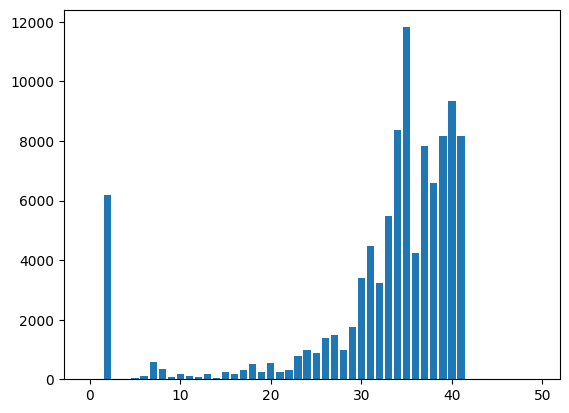

' \nCluster of 2 because there was probably some cluster with equal colors \n'

In [109]:
import matplotlib.pyplot as plt 

# bar (x vals, y vals) 
plt.bar( range(len(h)), h) 
plt.show()

""" 
Cluster of 2 because there was probably some cluster with equal colors 
""" 

## Analyzing reads by position

gc content 

In [119]:
def find_gc_by_pos(reads):

    """ Quantify what percent of the reads have g or c at each position 
    for every position in a 100 base pair read. """ 
    
    """ A read is 100 base pairs so 100 positions. """ 
    gc = [0] * 100
    totals = [0] * 100 

    """ For every read
    add +1 to the gc count at that position if there's a g or c 
    add +1 to the totals count. """ 
    for read in reads: 
        for pos in range(len(read)):
            if read[pos] == 'C' or read[pos] == 'G':
                gc[pos] += 1
            totals[pos] += 1

    """ The percent of reads that have gc at each position """ 
    for i in range(len(gc)):
        if totals[i] > 0:
            gc[i] = gc[i]/float(totals[i])

    return gc

In [122]:
gc = find_gc_by_pos(seqs)

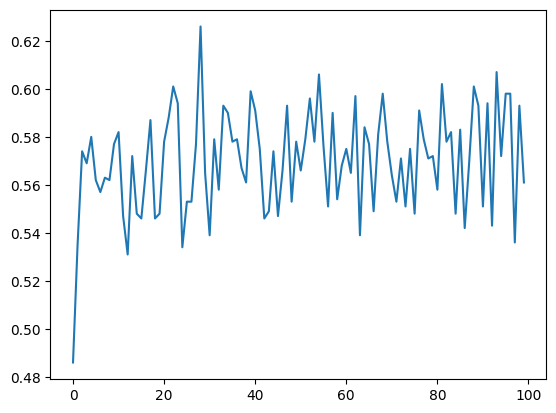

In [126]:
plt.plot (range(100), gc) 
plt.show()

# should be fairly constant 
# constantly over 50 percent because human genome gc content is over 50 

In [128]:
count = collections.Counter()
for seq in seqs:
    count.update(seq) 
print(count)
# N reported 18 times, N was no confidence. 

Counter({'G': 28742, 'C': 28272, 'T': 21836, 'A': 21132, 'N': 18})


## Sequencers give pieces to genomic puzzles

## Read alignment and why it's hard

## Naive Exact Matching Algorithm ( O (n^2) ) 
We would like the find all indices at which a string occurs in another string. 

In [176]:
def naive(p, t): 
    occurences = []
    """ i is every index until the last one we search. """
    for i in range(len(t) - len(p) + 1):
        """ at every i, we search a substring of t starting at i, equivalent to the length of p. 
        For a length of p = 4, we compare indices 0 1 2 3 of p and indices i+0, i+1, i+2, i+3 of t.
        As soon as we find the first dissimilar character, stop the comparision and move to the next index of i.""" 
        for j in range(len(p)):
            match = True
            if p[j] != t[i+j]: 
                match = False 
                break
        """ If we found no dissimilar characters, append i to occurences. """ 
        if match:
            occurences.append(i)
    return occurences

In [177]:
naive('word', 'worword')

[3]

## Matching artificial reads

Now that we have the naive exact matching algo, we can look for random reads in the phix genome

In [202]:
phix = read_genome('phix.fa') # read the genome. 
type(phix)

str

In [203]:
import random 
def generate_reads(genome, num_reads, read_len): 
    """ generate reads from random positions in a source genome """
    # to hold the reads 
    reads = []
    for _ in range(num_reads):
        start = random.randint(0, len(genome) - read_len)
        reads.append(genome[start: start + read_len])
    return reads 

In [204]:
""" All of these reads should have a place in the phix genome. """ 
generate_reads(phix, 100, 100)

['TTGAATATCTATAACAACTATTTTAAAGCGCCGTGGATGCCTGACCGTACCGAGGCTAACCCTAATGAGCTTAATCAAGATGATGCTCGTTATGGTTTCC',
 'GACCATGCCGCTTTTCTTGGCACGATTAACCCTGATACCAATAAAATCCCTAAGCATTTGTTTCAGGGTTATTTGAATATCTATAACAACTATTTTAAAG',
 'AGAGATTCAGTACCTTAACGCTAAAGGTGCTTTGACTTATACCGATATTGCTGGCGACCCTGTTTTGTATGGCAACTTGCCGCCGCGTGAAATTTCTATG',
 'TCTACCACATCTATTGACATTATGGGTCTGCAAGCTGCTTATGCTAATTTGCATACTGACCAAGAACGTGATTACTTCATGCAGCGTTACCATGATGTTA',
 'CTGACGAGTAACAAAGTTTGGATTGCTACTGACCGCTCTCGTGCTCGTCGCTGCGTTGAGGCTTGCGTTTATGGTACGCTGGACTTTGTGGGATACCCTC',
 'TGTTCCTAACCCTGATGAGGCCGCCCCTAGTTTTGTTTCTGGTGCTATGGCTAAAGCTGGTAAAGGACTTCTTGAAGGTACGTTGCAGGCTGGCACTTCT',
 'TTGCTGCCGAGGGTCGCAAGGCTAATGATTCACACGCCGACTGCTATCAGTATTTTTGTGTGCCTGAGTATGGTACAGCTAATGGCCGTCTTCATTTCCA',
 'AATGCTACAATGTGCTCCCCCAACTTGATATTAATAACACTATAGACCACCGCCCCGAAGGGGACGAAAAATGGTTTTTAGAGAACGAGAAGACGGTTAC',
 'TTTTCCGCCTACTGCGACTAAAGAGATTCAGTACCTTAACGCTAAAGGTGCTTTGACTTATACCGATATTGCTGGCGACCCTGTTTTGTATGGCAACTTG',
 'AATCCCAATGCTTTGCGTGACTATTTTCGTGATATTGGTCGTATGGTTCTTGC

In [205]:
""" Count the number that match. (Should be all of them """
num_match = 0 
""" for every read in the generated reads list, update num_matches if the indices spit out by naive is 
at least one (len > 0) """
for read in generate_reads(phix, 100, 100):
    matches = naive(read, phix)
    if len(matches) > 0:
        num_match += 1
print(num_match)

100


## Matching real reads

In [227]:
phix_reads, _ = parse_fastq('ERR266411_1.first1000.fastq') # sequencing reads

In [229]:
num_match = 0 
total_reads = 0 
for phix_read in phix_reads: 
    matches = naive(phix_read, phix)
    total_reads += 1
    if len(matches) > 0:
        num_match += 1
print(f'{num_match} / {total_reads}')

7 / 1000


In [230]:
"""With less bases per read. 
It's now attempting to match only first 30 bases of each read, 
but there are still 1000 reads.""" 
num_match = 0 
total_reads = 0 
for phix_read in phix_reads: 
    phix_read = phix_read[:30]
    matches = naive(phix_read, phix)
    total_reads += 1
    if len(matches) > 0:
        num_match += 1
print(f'{num_match} / {total_reads}')

459 / 1000


In [233]:
"""With less bases per read. 
It's now attempting to match only first 30 bases of each read, 
but there are still 1000 reads.""" 
num_match = 0 
total_reads = 0 
for phix_read in phix_reads: 
    phix_read = phix_read[:30]
    matches = naive(phix_read, phix)
    matches.extend(naive( reverse_complement(phix_read), phix ) )
    total_reads += 1
    if len(matches) > 0:
        num_match += 1
print(f'{num_match} / {total_reads}')

932 / 1000
